# Visualizing Grades Analysis
#### Teo Zeng

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
grades = pd.read_csv("grades.csv")
grades.columns

Index(['Quarter', 'Course_Level', 'Course', 'Instructor', 'Grade_Given',
       'Sum_of_Student_Count'],
      dtype='object')

Finding unique values in a column

In [4]:
instructor_list = grades["Instructor"].unique()
quarter_list = grades["Quarter"].unique()
course_level_list = grades["Course_Level"].unique()
course_list = grades["Course"].unique()

### How hard is it in general to get an A? We consider A,A-,A+ are all A's.

In [5]:
rate = {}
for instructor in instructor_list:
    df = grades.loc[grades['Instructor'] == instructor]
    total_students = sum(df["Sum_of_Student_Count"])
    if total_students == 0:
        rate[instructor] = 0
        continue
    df_A = df.loc[(df['Grade_Given'] == "A") | (df['Grade_Given'] == "A-") | (df['Grade_Given'] == "A+")]
    number_of_A_students = sum(df_A["Sum_of_Student_Count"])
    rate[instructor] = number_of_A_students / total_students
sorted_rate = dict(sorted(rate.items(), key=lambda x: x[1], reverse=True))

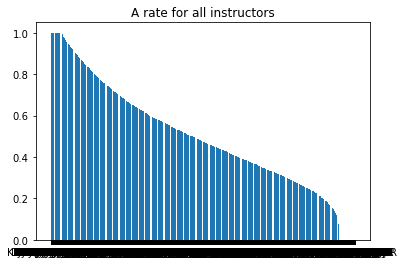

In [6]:
plt.bar(range(len(sorted_rate)), list(sorted_rate.values()), align='center')
plt.xticks(range(len(sorted_rate)), list(sorted_rate.keys()))
plt.title("A rate for all instructors")
plt.show()

### Which majors are harder to get A's?

A list of departments

In [8]:
dept_list = np.unique([course[0:5] for course in course_list])
dept_list

array(['ANTH ', 'ART  ', 'ARTHI', 'ARTST', 'AS AM', 'ASTRO', 'BIOL ',
       'BL ST', 'BMSE ', 'C LIT', 'CH E ', 'CH ST', 'CHEM ', 'CHIN ',
       'CLASS', 'CMPSC', 'CMPTG', 'CNCSP', 'COMM ', 'DANCE', 'DYNS ',
       'EACS ', 'EARTH', 'ECE  ', 'ECON ', 'ED   ', 'EDS  ', 'EEMB ',
       'ENGL ', 'ENGR ', 'ENV S', 'ES   ', 'ESM  ', 'ESS  ', 'FAMST',
       'FEMST', 'FLMST', 'FR   ', 'GEOG ', 'GEOL ', 'GER  ', 'GLOBL',
       'GPS  ', 'GRAD ', 'GREEK', 'HEB  ', 'HIST ', 'INT  ', 'ITAL ',
       'JAPAN', 'KOR  ', 'LAIS ', 'LATIN', 'LAWSO', 'LING ', 'LIT  ',
       'MARSC', 'MAT  ', 'MATH ', 'MATRL', 'MCDB ', 'ME   ', 'ME ST',
       'MES  ', 'MS   ', 'MUS  ', 'MUS A', 'PHIL ', 'PHYS ', 'POL S',
       'PORT ', 'PSTAT', 'PSY  ', 'RG ST', 'RUSS ', 'SHS  ', 'SLAV ',
       'SOC  ', 'SPAN ', 'THTR ', 'TMP  ', 'W&L  ', 'WRIT '], dtype='<U5')

In [11]:
dept_rate = {}
for d in dept_list:
    df = grades[grades['Course'].str.startswith(d)]
    total_students = sum(df["Sum_of_Student_Count"])
    if total_students == 0:
        dept_rate[d] = 0
        continue
    df_A = df.loc[(df['Grade_Given'] == "A") | (df['Grade_Given'] == "A-") | (df['Grade_Given'] == "A+")]
    number_of_A_students = sum(df_A["Sum_of_Student_Count"])
    dept_rate[d] = number_of_A_students / total_students
sorted_dept_rate = dict(sorted(dept_rate.items(), key=lambda x: x[1], reverse=True))

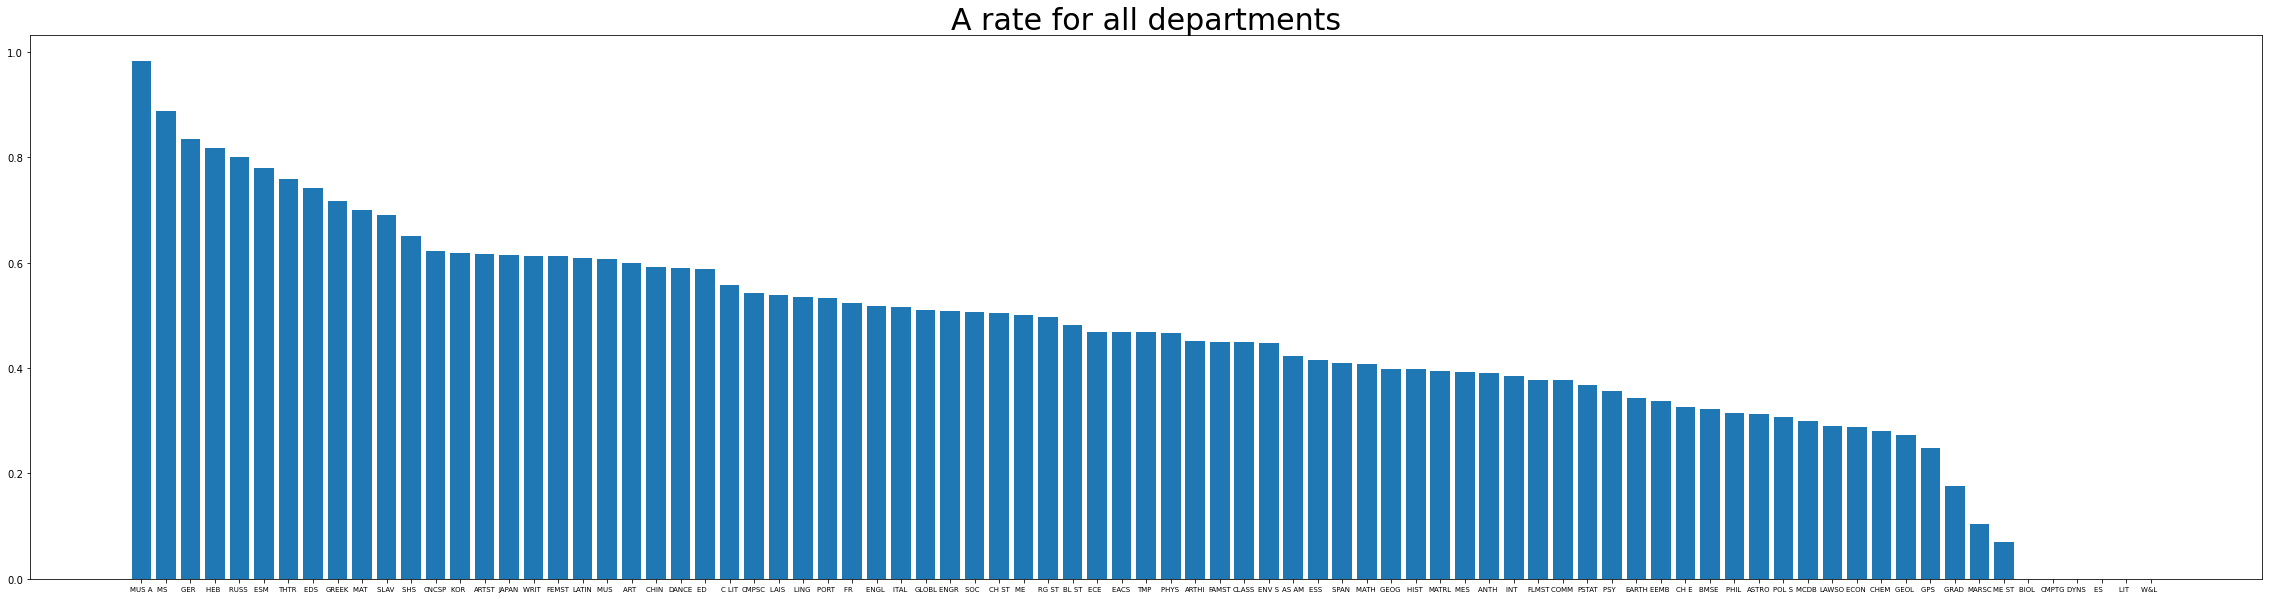

In [25]:
fig = plt.figure(figsize=(40, 10))
plt.bar(range(len(sorted_dept_rate)), list(sorted_dept_rate.values()), align='center')
plt.xticks(range(len(sorted_dept_rate)), list(sorted_dept_rate.keys()))
plt.title("A rate for all departments", fontsize=30)
plt.xticks(fontsize=7)
plt.show()

### Failing Rate for All Departments

In [26]:
dept_rate_fail = {}
for d in dept_list:
    df = grades[grades['Course'].str.startswith(d)]
    total_students = sum(df["Sum_of_Student_Count"])
    if total_students == 0:
        dept_rate_fail[d] = 0
        continue
    df_A = df.loc[(df['Grade_Given'] == "D") | (df['Grade_Given'] == "C-") | (df['Grade_Given'] == "D+")| (df['Grade_Given'] == "D")| (df['Grade_Given'] == "D-")| (df['Grade_Given'] == "F")]
    number_of_A_students = sum(df_A["Sum_of_Student_Count"])
    dept_rate_fail[d] = number_of_A_students / total_students
sorted_dept_rate_fail = dict(sorted(dept_rate_fail.items(), key=lambda x: x[1], reverse=True))

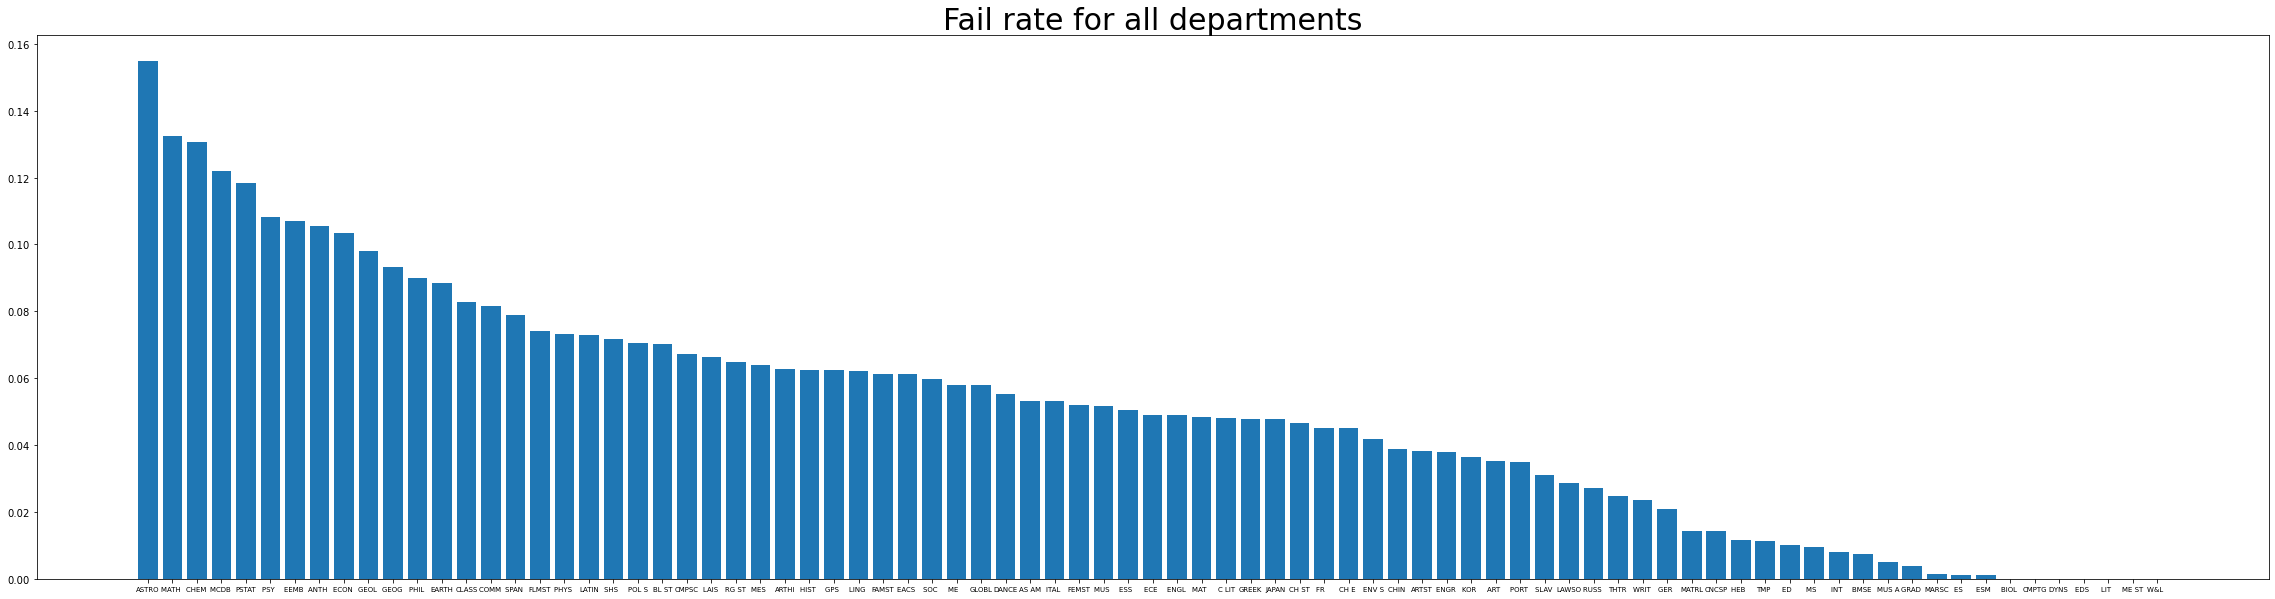

In [28]:
fig = plt.figure(figsize=(40, 10))
plt.bar(range(len(sorted_dept_rate_fail)), list(sorted_dept_rate_fail.values()), align='center')
plt.xticks(range(len(sorted_dept_rate_fail)), list(sorted_dept_rate_fail.keys()))
plt.title("Fail rate for all departments", fontsize=30)
plt.xticks(fontsize=7)
plt.show()